# 1. Importing Modules

In [1]:
import numpy
import tensorflow
from tensorflow import keras
from keras.datasets import imdb
from matplotlib import pyplot

- The IMDB dataset consists of reviews

# Data Loading

In [2]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data() # Cleaned Data
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

17464789/17464789 [==============================] - 1s 0us/step


In [5]:
# Finding the number of datapoints in the dataset
print(X.shape,X_train.shape,X_test.shape)

(50000,) (25000,) (25000,)


- 50% Data is going in Train and 50% is going in Test

In [6]:
type(X)

numpy.ndarray

In [7]:
X[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

- the above output is Different locations of words

In [8]:
# Finding unique classes in the dataset
numpy.unique(y)

array([0, 1])

In [9]:
# Number of unique words in the data
# # X is a huge 2D array with each element being another array containing the
# encoded sentence
len(numpy.unique(numpy.hstack(X)))
# hstack will convert 2D array to 1D array in sequential fashion

88585

Working of hstack
```
a = [[1],
     [2],
     [3]]

a = [1,2,3]
```

Mean = 234.75892, Std = 172.91149458735703


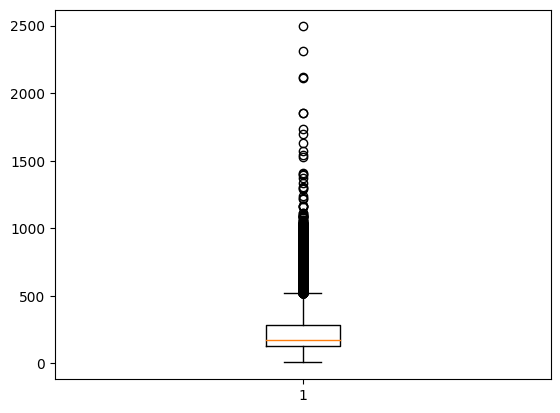

In [10]:
# Boxplot of the length of the reviews

# Finding the length of each review and storing it in a list

length = [len(x) for x in X] # X= [[],[],[]] each array in this 2d array is a sentence

print("Mean = {}, Std = {}".format(numpy.mean(length), numpy.std(length)))
pyplot.boxplot(length)
pyplot.show()

- within 500 words almost all reviews are covered however we still have some outliers in the data

# Model Building

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Embedding
from keras.utils import pad_sequences

In [12]:
# Reloading the data with top 5000 most frequent words
# If a word has a frequecy less than 5000 then it will not be imported
# This is basically removing the infrequent words from the data

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)

X_train = pad_sequences(X_train, maxlen = 500)
# Converts each sentence in X_train to a length of 500
# If the sentence is larger than 500 words it chops it off at 500 and if it is
# less than 500 words it then pads 0s in the begining of the array to make the length 500

X_test = pad_sequences(X_test, maxlen = 500)

In [13]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [14]:
print(X_train.shape,y_train.shape)

(25000, 500) (25000,)


In [15]:
# Building the Model
model = Sequential()

model.add(Embedding(5000,32,input_length = 500))
# Embedding Layer learns the word vector representations here alternatively we can
# use word2vec or GloVE representations also
# 5000 words in dictionary/vocabulary
# Number of dimension of the vector to be learnt: 32
# Input length is the number of words in the specific sentence

model.add(Dense(250, activation = 'relu'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid')) # because we are doing binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 2, batch_size = 128)

Epoch 1/2
196/196 [==============================] - 43s 216ms/step - loss: 0.4773 - accuracy: 0.7406
Epoch 2/2
196/196 [==============================] - 42s 214ms/step - loss: 0.2302 - accuracy: 0.9096


In [16]:
scores = model.evaluate(X_test, y_test)
print(scores)

782/782 [==============================] - 12s 15ms/step - loss: 0.2953 - accuracy: 0.8776
[0.29525846242904663, 0.8776000142097473]


In [17]:
model = Sequential()
model.add(Embedding(5000,32,input_length = 500))
model.add(LSTM(100)) # 100 is the number of nodes in a timestep i.e. number of neurons in each time step
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 2, batch_size = 128)

Epoch 1/2
196/196 [==============================] - 228s 1s/step - loss: 0.4906 - accuracy: 0.7669
Epoch 2/2
196/196 [==============================] - 224s 1s/step - loss: 0.2946 - accuracy: 0.8824


In [18]:
scores = model.evaluate(X_test, y_test)
print(scores)

782/782 [==============================] - 89s 113ms/step - loss: 0.3084 - accuracy: 0.8723
[0.3084126114845276, 0.8723199963569641]
